# 1. Improting the libraries

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

# 2. Loading the Dataset

In [99]:
df = pd.read_csv("./winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 3. Exploratory Data Analysis (EDA)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.8 KB


In [101]:
df.quality.value_counts()

quality
5    680
6    637
7    199
4     52
8     18
3     10
Name: count, dtype: int64

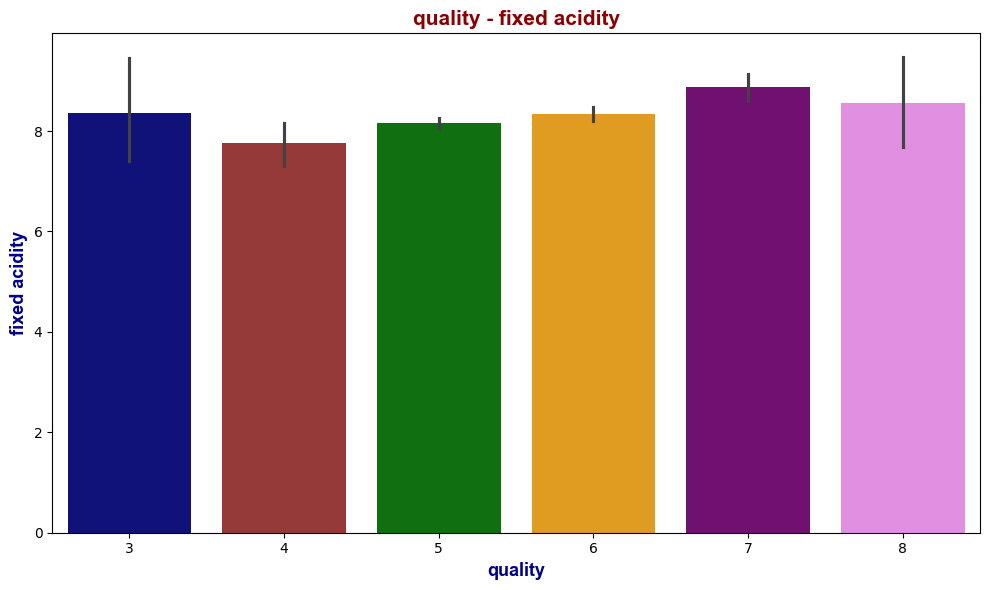

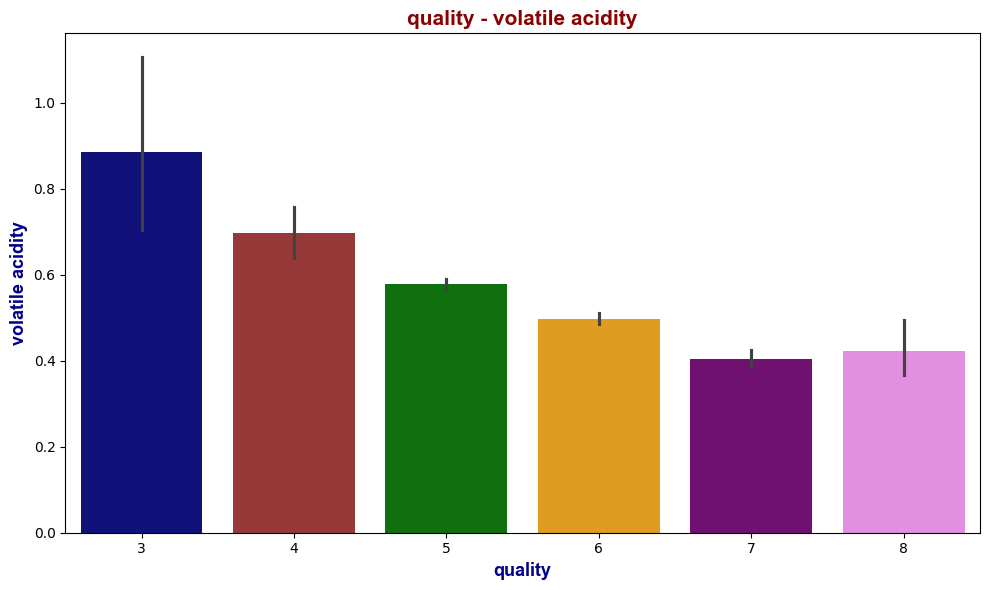

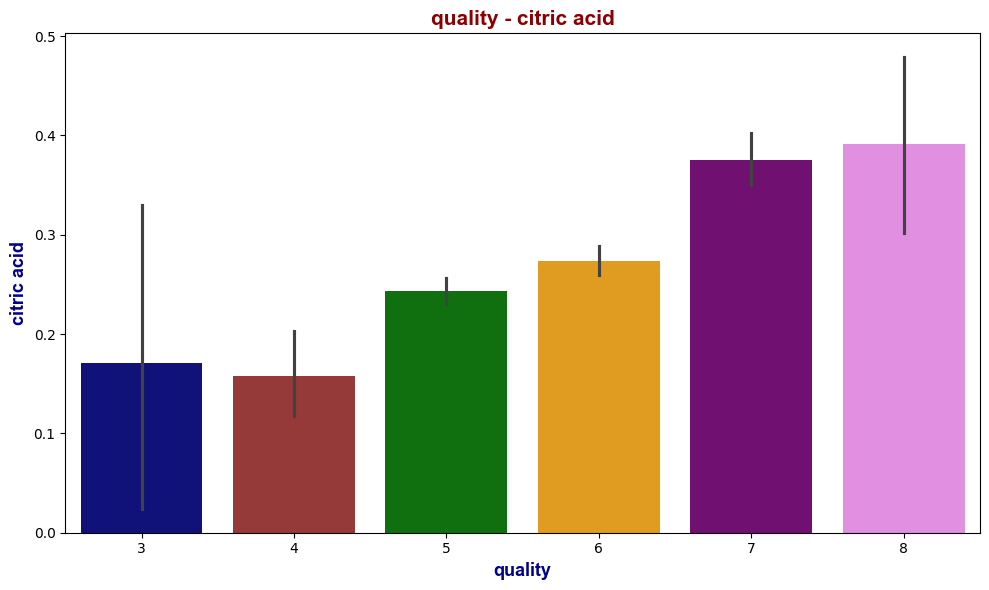

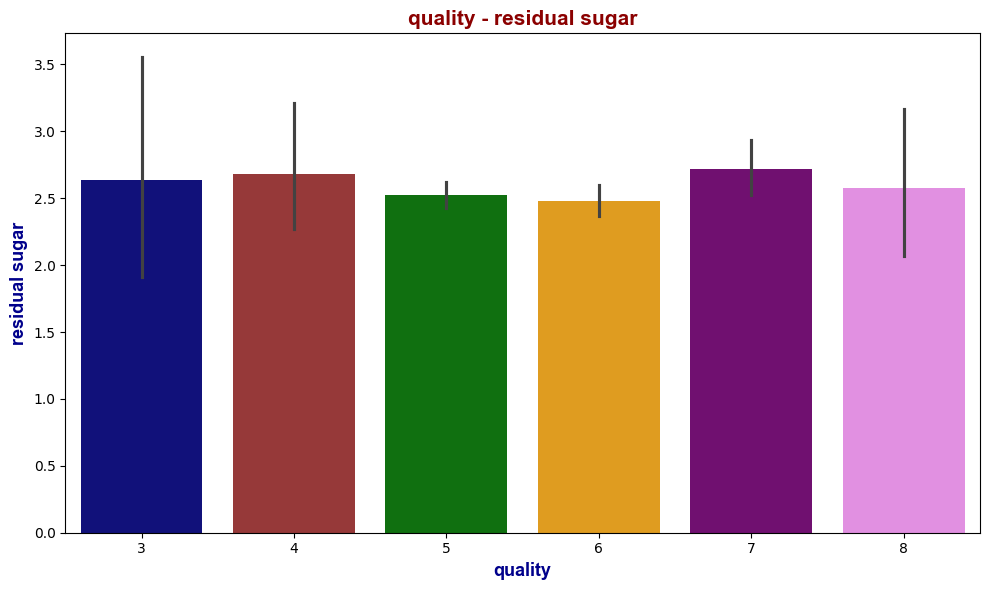

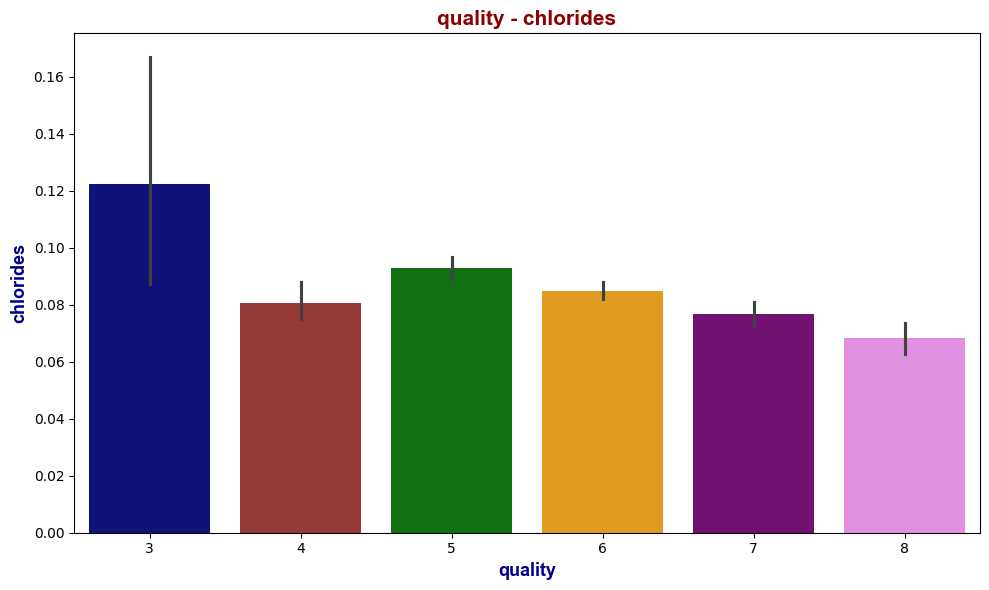

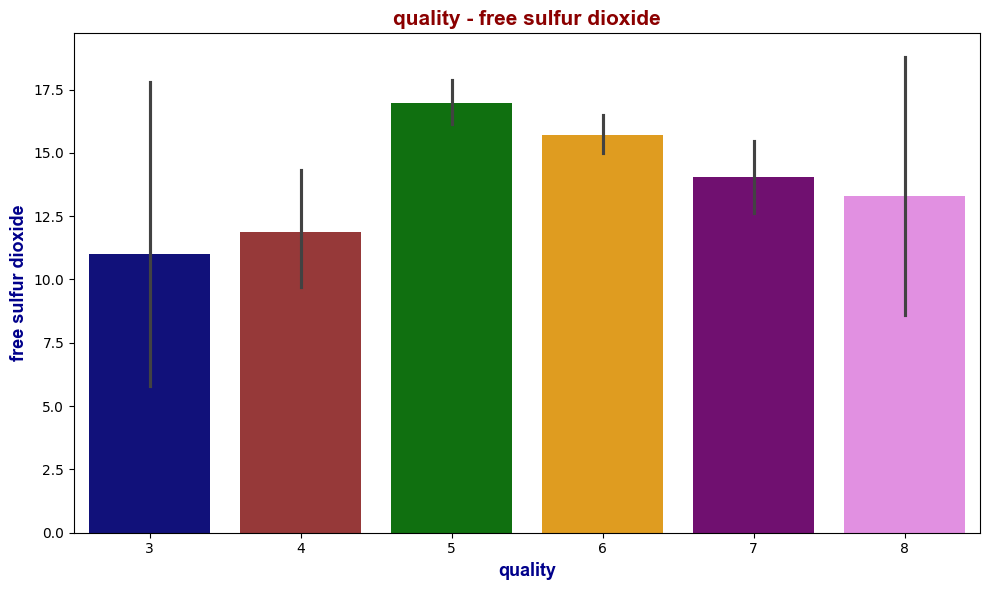

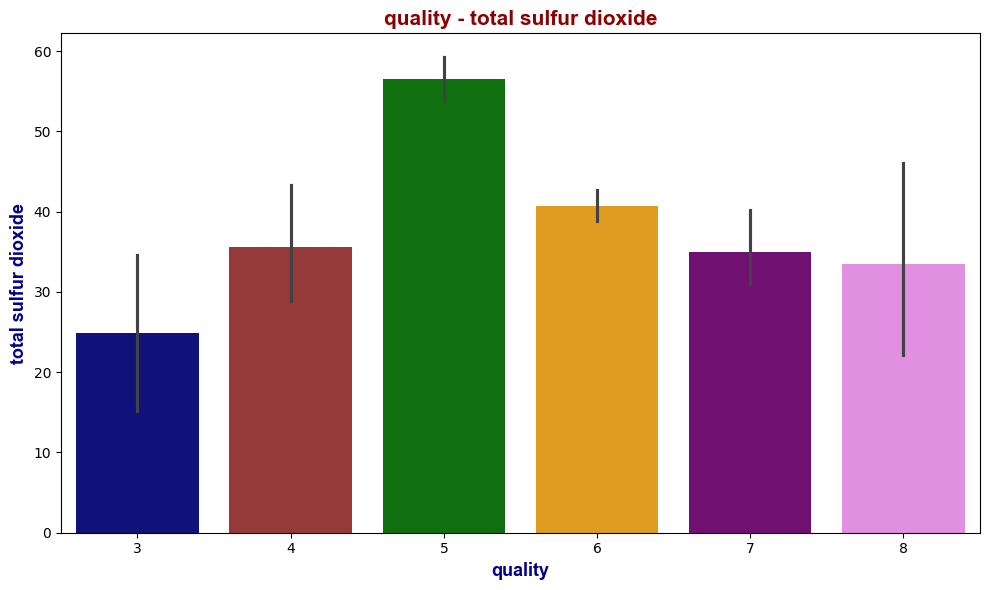

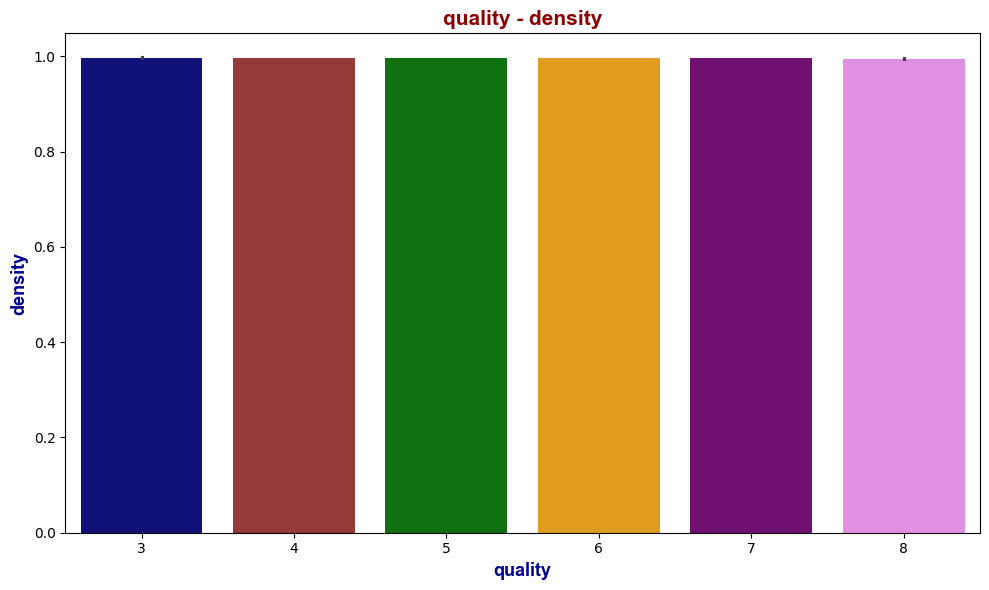

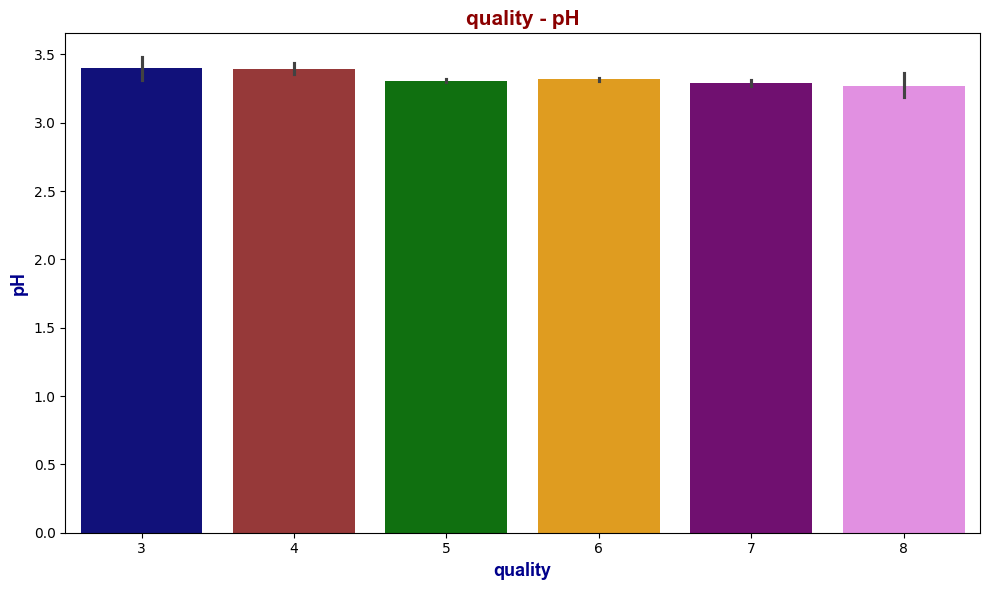

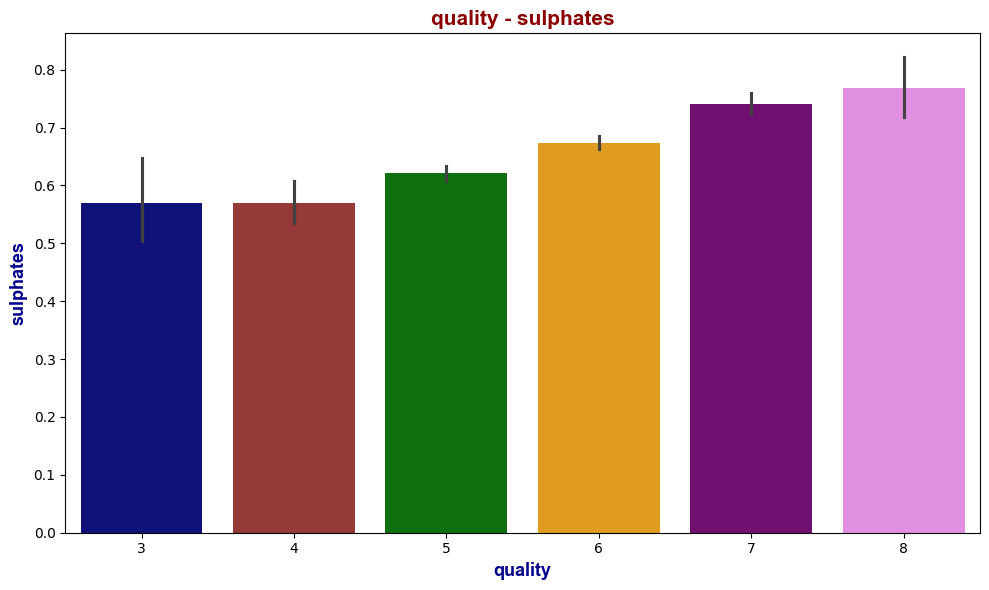

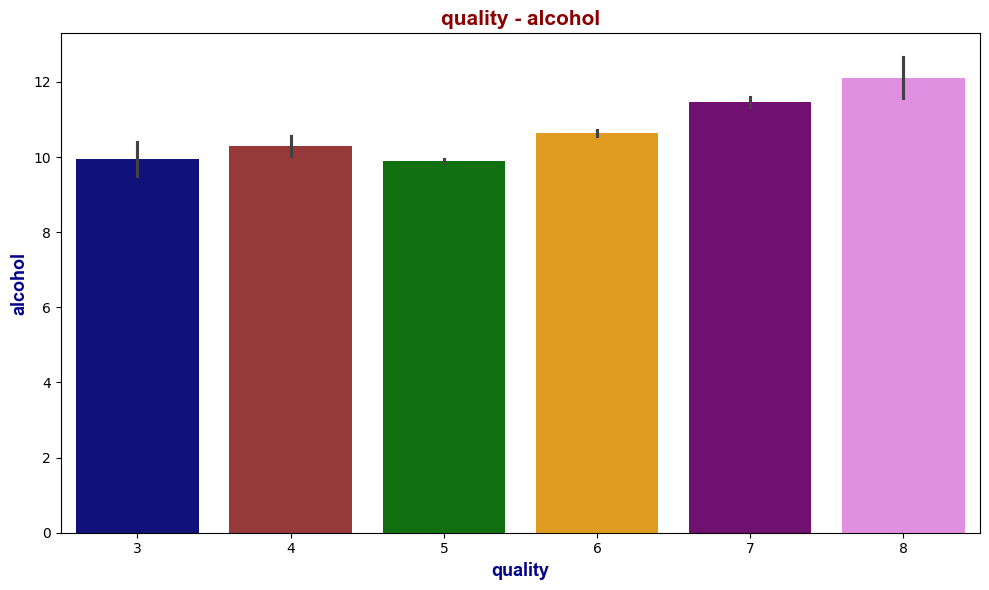

In [102]:
title_font = {"family": "arial", "color": "darkred", "weight": "bold", "size": 15}
axis_font = {"family": "arial", "color": "darkblue", "weight": "bold", "size": 13}


for i in df.columns[: -1]:
    plt.figure(figsize = (10, 6))
    sns.barplot(x = "quality", y = i, data = df, palette = ["darkblue", "brown", "green", "orange", "purple", "violet"])


    plt.title("quality - " + i, fontdict = title_font )
    plt.xlabel("quality", fontdict = axis_font)
    plt.ylabel(i, fontdict = axis_font)

    plt.tight_layout()
    plt.show()

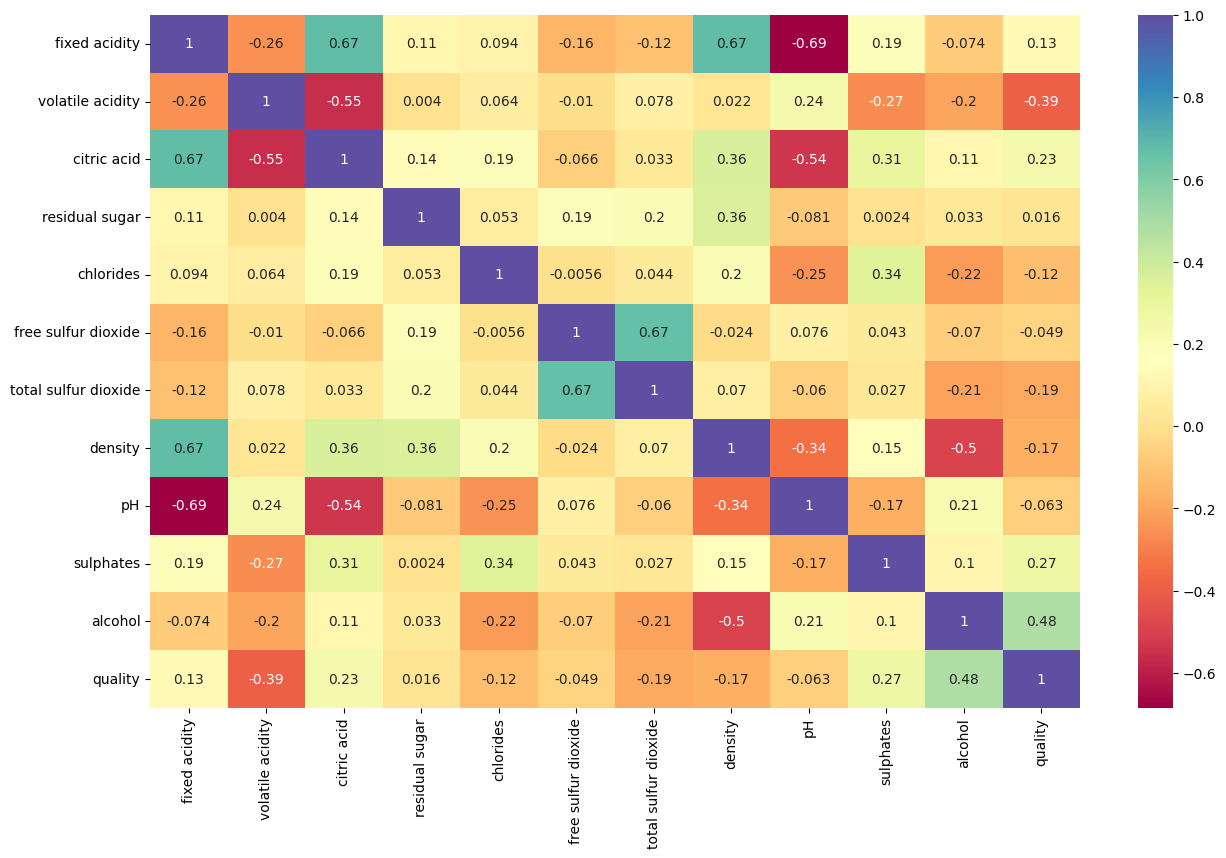

In [103]:
plt.figure(figsize = (15, 9))
sns.heatmap(df.corr(), annot = True, cmap = "Spectral")
plt.show()

In [104]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 4. Preparation for modeling

In [105]:
df.drop(["residual sugar", "free sulfur dioxide", "pH"], axis = 1, inplace = True)
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


In [106]:
bins = (2, 6.5, 8)
group_names = ["bad", "good"]

df["quality"] = pd.cut(df["quality"], bins = bins, labels = group_names)

In [107]:
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,bad
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,bad
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,bad
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,bad
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,bad


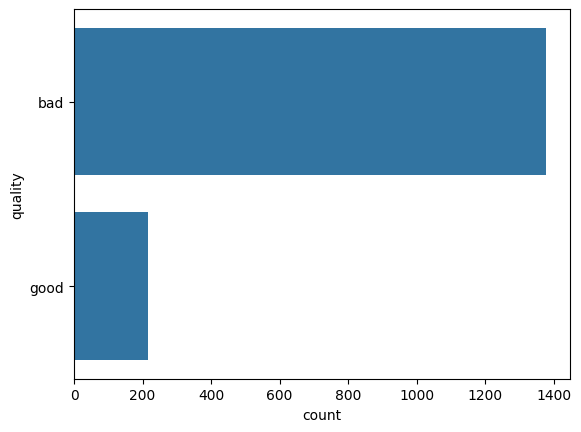

In [108]:
sns.countplot(df["quality"])
plt.show()

In [109]:
from sklearn.preprocessing import LabelEncoder

new_quality = LabelEncoder()

df["quality"] = new_quality.fit_transform(df["quality"])

In [110]:
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,0
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,0
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,0
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,0
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,0


In [111]:
df.quality.value_counts()

quality
0    1379
1     217
Name: count, dtype: int64

# 5. Modelling

In [112]:
x = df.drop(["quality"], axis = 1)
y = df["quality"]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#### Note: Support Vector Machine requires scaled data. Thus, we need to standardize our data before we fit the model.

## Scaling

##### this is the process of bringing the variables into a common scale. It means the mean for all the variables will become 0 and the std will be 1.

In [113]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## SVC Modelling

In [114]:
from sklearn.svm import SVC

clf = SVC()

clf.fit(x_train, y_train)


SVC()

## Model Evaluation

In [115]:
y_preds = clf.predict(x_test)

cv_scores = cross_val_score(estimator = clf, X = x_train, y = y_train)

cv_scores.mean()

0.8840104166666667

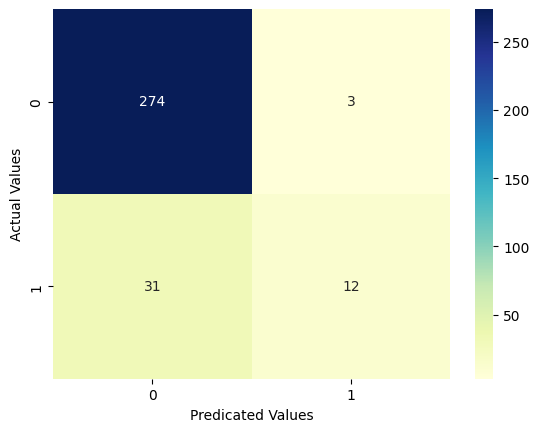

In [116]:
cnf = confusion_matrix(y_test, y_preds)

sns.heatmap(cnf, annot = True, cmap = "YlGnBu", fmt = "d")
plt.xlabel("Predicated Values")
plt.ylabel("Actual Values")
plt.show()

In [117]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       277
           1       0.80      0.28      0.41        43

    accuracy                           0.89       320
   macro avg       0.85      0.63      0.68       320
weighted avg       0.89      0.89      0.87       320



#### Note: we can see in the confusion matrix that our model did not perform well, especially in the FN section. Thus, we need to perform hyper parameter optimization.

# 6. Hyper Parameter Optimization

In [118]:
model2 = SVC()

params_grid = {
    "C": [0.1, 1, 10],
    "gamma": [1, 0.1, 0.01],
    "kernel": ["poly", "rbf"]
}

gs_cv = GridSearchCV(estimator = model2, param_grid = params_grid, cv = 5)

gs_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['poly', 'rbf']})

In [119]:
gs_cv.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [120]:
model_tuned = SVC(C = 10, gamma = 1, kernel = "rbf")

model_tuned.fit(x_train, y_train)

y_pred_tuned = model_tuned.predict(x_test)

In [121]:
confusion_matrix = confusion_matrix(y_test, y_pred_tuned)



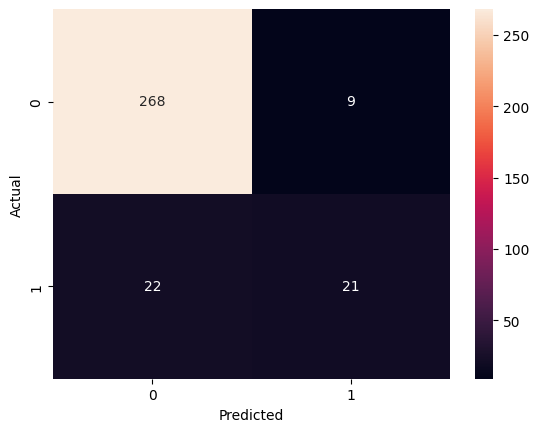

In [122]:
sns.heatmap(confusion_matrix, annot = True, fmt = "d")

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

In [123]:
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       277
           1       0.70      0.49      0.58        43

    accuracy                           0.90       320
   macro avg       0.81      0.73      0.76       320
weighted avg       0.89      0.90      0.90       320

